In [46]:
#Reading the Image

import cv2
import numpy as np
from matplotlib import pyplot as plt

B = 8
fn = 'D:\Academics\TY BTech\Sem 6\DSP\Project\Images\emma.png'
img1 = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)
print(img1)

h, w = np.array(img1.shape[:2])//B * B
print(h)
print(w)
img1 = img1[:h, :w]


[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [21 21 21 ...  0  0  0]
 [21 21 21 ...  0  0  0]
 [21 21 21 ...  0  0  0]]
496
496


[[1. 1.]
 [2. 2.]]


Text(0.5, 1.0, 'Original Image')

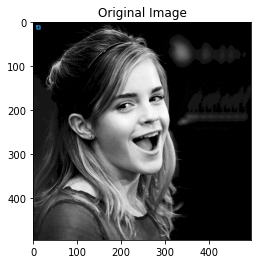

In [47]:
#Printing original Image

plt.imshow(img1, cmap = "gray")
point = [(10, 10), (18, 18)]
block = np.floor(np.array(point)/B)
print(block)
col = block[0, 0]
row = block[0, 1]
plt.plot([B * col, B * col + B, B * col + B, B * col, B * col], [B * row, B * row, B * row + B, B * row + B, B * row])
plt.axis([0, w, h, 0])
plt.title('Original Image')

In [48]:
#Image compression using DCT

blocksV = h // B
blocksH = w // B
vis = np.zeros((h, w), np.float32)
Trans = np.zeros((h, w), np.float32)
vis[:h, :w] = img1

for row in range(blocksV):
    for col in range(blocksH):
        currentblock = cv2.dct(vis[row * B : (row + 1) * B, col * B : (col + 1) * B])
        Trans[row * B : (row + 1) * B, col * B : (col + 1) * B] = currentblock
        
cv2.imwrite('Emma Compressed.jpg', Trans)

True

In [49]:
#Image Reconstruction using IDCT

back = np.zeros((h, w), np.float32)

for row in range(blocksV):
    for col in range(blocksH):
        currentblock = cv2.idct(Trans[row * B : (row + 1) * B, col * B : (col + 1) * B])
        back[row * B : (row + 1) * B, col * B : (col + 1) * B] = currentblock
        
cv2.imwrite('Emma Reconstructed.jpg', back)


True